In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

In [6]:
weather_df = pd.read_csv("https://raw.githubusercontent.com/ReinardPieters/MLG382_Assignment_2/refs/heads/main/artifacts/cleaned_data.csv?token=GHSAT0AAAAAADCR2OLZPPMPBWTYM4LC2F4K2AI5MSA")

Understanding the data

In [7]:
print("DataFrame shape: ", weather_df.shape)
print("\n")
weather_df.info()
print("\n")
weather_df.loc[weather_df.duplicated()]

DataFrame shape:  (11503, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11503 entries, 0 to 11502
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           11503 non-null  float64
 1   Humidity              11503 non-null  int64  
 2   Wind Speed            11503 non-null  float64
 3   Precipitation (%)     11503 non-null  float64
 4   Cloud Cover           11503 non-null  object 
 5   Atmospheric Pressure  11503 non-null  float64
 6   UV Index              11503 non-null  int64  
 7   Season                11503 non-null  object 
 8   Visibility (km)       11503 non-null  float64
 9   Location              11503 non-null  object 
 10  Weather Type          11503 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 988.7+ KB




,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type


In [8]:
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [9]:
weather_df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000
mean,18.739459,69.859254,9.240807,52.136921,1006.102092,3.556550,5.069373
std,15.553678,18.935635,5.611502,31.934963,12.839429,3.575076,2.575653
min,-24.000000,22.000000,0.000000,0.000000,965.150000,0.000000,0.000000
25%,4.500000,59.000000,5.000000,18.000000,995.720000,1.000000,3.000000
50%,21.000000,70.000000,8.500000,56.000000,1007.610000,2.000000,5.000000
75%,30.000000,84.000000,13.500000,80.000000,1016.170000,6.000000,7.000000
max,64.000000,109.000000,26.000000,109.000000,1046.140000,14.000000,13.000000


Univariate analysis

In [10]:
def uniV(df):
    import pandas as pd
    weather_df = pd.read_csv("https://raw.githubusercontent.com/ReinardPieters/MLG382_Assignment_2/refs/heads/main/artifacts/cleaned_data.csv?token=GHSAT0AAAAAADCR2OLZPPMPBWTYM4LC2F4K2AI5MSA")
    
    # To store the mappings of string columns to numerical categories, so we can see and understand the mappings later
    category_mappings = {}
    
    # Converting the string columns to numerical categories
    categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
    for col in categorical_cols:
        if col in weather_df.columns:
            weather_df[col] = weather_df[col].astype('category')
            category_mappings[col] = dict(enumerate(weather_df[col].cat.categories))
            weather_df[col] = weather_df[col].cat.codes
    
    output_weather_df = pd.DataFrame(columns=['Count', 'Missing', 'Unique', 'Dtype', 'Mode', 
                                     'Mean', 'Min', '25%', 'Median', '75%', 'Max', 'Std', 'Skew', 'Kurt'])
    
    for col in weather_df:
        try:
            output_weather_df.loc[col] = [
                weather_df[col].count(), 
                weather_df[col].isnull().sum(), 
                weather_df[col].nunique(), 
                weather_df[col].dtype,
                weather_df[col].mode().values[0], 
                weather_df[col].mean(), 
                weather_df[col].min(), 
                weather_df[col].quantile(0.25),
                weather_df[col].median(),
                weather_df[col].quantile(0.75),  
                weather_df[col].max(),
                weather_df[col].std(),
                weather_df[col].skew(),
                weather_df[col].kurt()
            ]
        except Exception as e:
            print(f"Error processing column {col}: {str(e)}")
            continue

    output_weather_df.attrs['category_mappings'] = category_mappings
    
    return output_weather_df

In [11]:
# Printing the catagories to see the mappings
result = uniV(weather_df)
category_mappings = result.attrs.get('category_mappings', {})

for col, mapping in category_mappings.items():
    print(f"\n{col} category mapping:")
    for code, label in mapping.items():
        print(f"{code}: {label}")


Cloud Cover category mapping:
0: clear
1: cloudy
2: overcast
3: partly cloudy

Season category mapping:
0: Autumn
1: Spring
2: Summer
3: Winter

Location category mapping:
0: coastal
1: inland
2: mountain

Weather Type category mapping:
0: Cloudy
1: Rainy
2: Snowy
3: Sunny


In [12]:
uniV(weather_df)


,Count,Missing,Unique,Dtype,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
Temperature,11503,0,88,float64,32.00,18.739459,-24.00,4.50,21.00,30.00,64.00,15.553678,-0.185617,-0.576810
Humidity,11503,0,88,int64,60.00,69.859254,22.00,59.00,70.00,84.00,109.00,18.935635,-0.394419,-0.225231
Wind Speed,11503,0,53,float64,9.00,9.240807,0.00,5.00,8.50,13.50,26.00,5.611502,0.399625,-0.551536
Precipitation (%),11503,0,110,float64,16.00,52.136921,0.00,18.00,56.00,80.00,109.00,31.934963,-0.104685,-1.376092
Cloud Cover,11503,0,4,int8,2.00,1.998783,0.00,2.00,2.00,3.00,3.00,1.021418,-0.969426,-0.142790
Atmospheric Pressure,11503,0,4419,float64,1013.57,1006.102092,965.15,995.72,1007.61,1016.17,1046.14,12.839429,-0.205847,-0.813197
UV Index,11503,0,15,int64,1.00,3.556550,0.00,1.00,2.00,6.00,14.00,3.575076,1.047421,-0.005104
Season,11503,0,4,int8,3.00,1.885160,0.00,1.00,2.00,3.00,3.00,1.161805,-0.475031,-1.294633
Visibility (km),11503,0,27,float64,1.50,5.069373,0.00,3.00,5.00,7.00,13.00,2.575653,0.212234,-0.927504
Location,11503,0,3,int8,1.00,1.106059,0.00,0.00,1.00,2.00,2.00,0.787035,-0.189182,-1.363535


Getting a summary of the numerical columns

In [13]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 
                 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

print("Summary statistics for numerical variables:")
weather_df[numerical_cols].describe()

Summary statistics for numerical variables:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000,11503.000000
mean,18.739459,69.859254,9.240807,52.136921,1006.102092,3.556550,5.069373
std,15.553678,18.935635,5.611502,31.934963,12.839429,3.575076,2.575653
min,-24.000000,22.000000,0.000000,0.000000,965.150000,0.000000,0.000000
25%,4.500000,59.000000,5.000000,18.000000,995.720000,1.000000,3.000000
50%,21.000000,70.000000,8.500000,56.000000,1007.610000,2.000000,5.000000
75%,30.000000,84.000000,13.500000,80.000000,1016.170000,6.000000,7.000000
max,64.000000,109.000000,26.000000,109.000000,1046.140000,14.000000,13.000000


Plotting the distributions for numerical columns

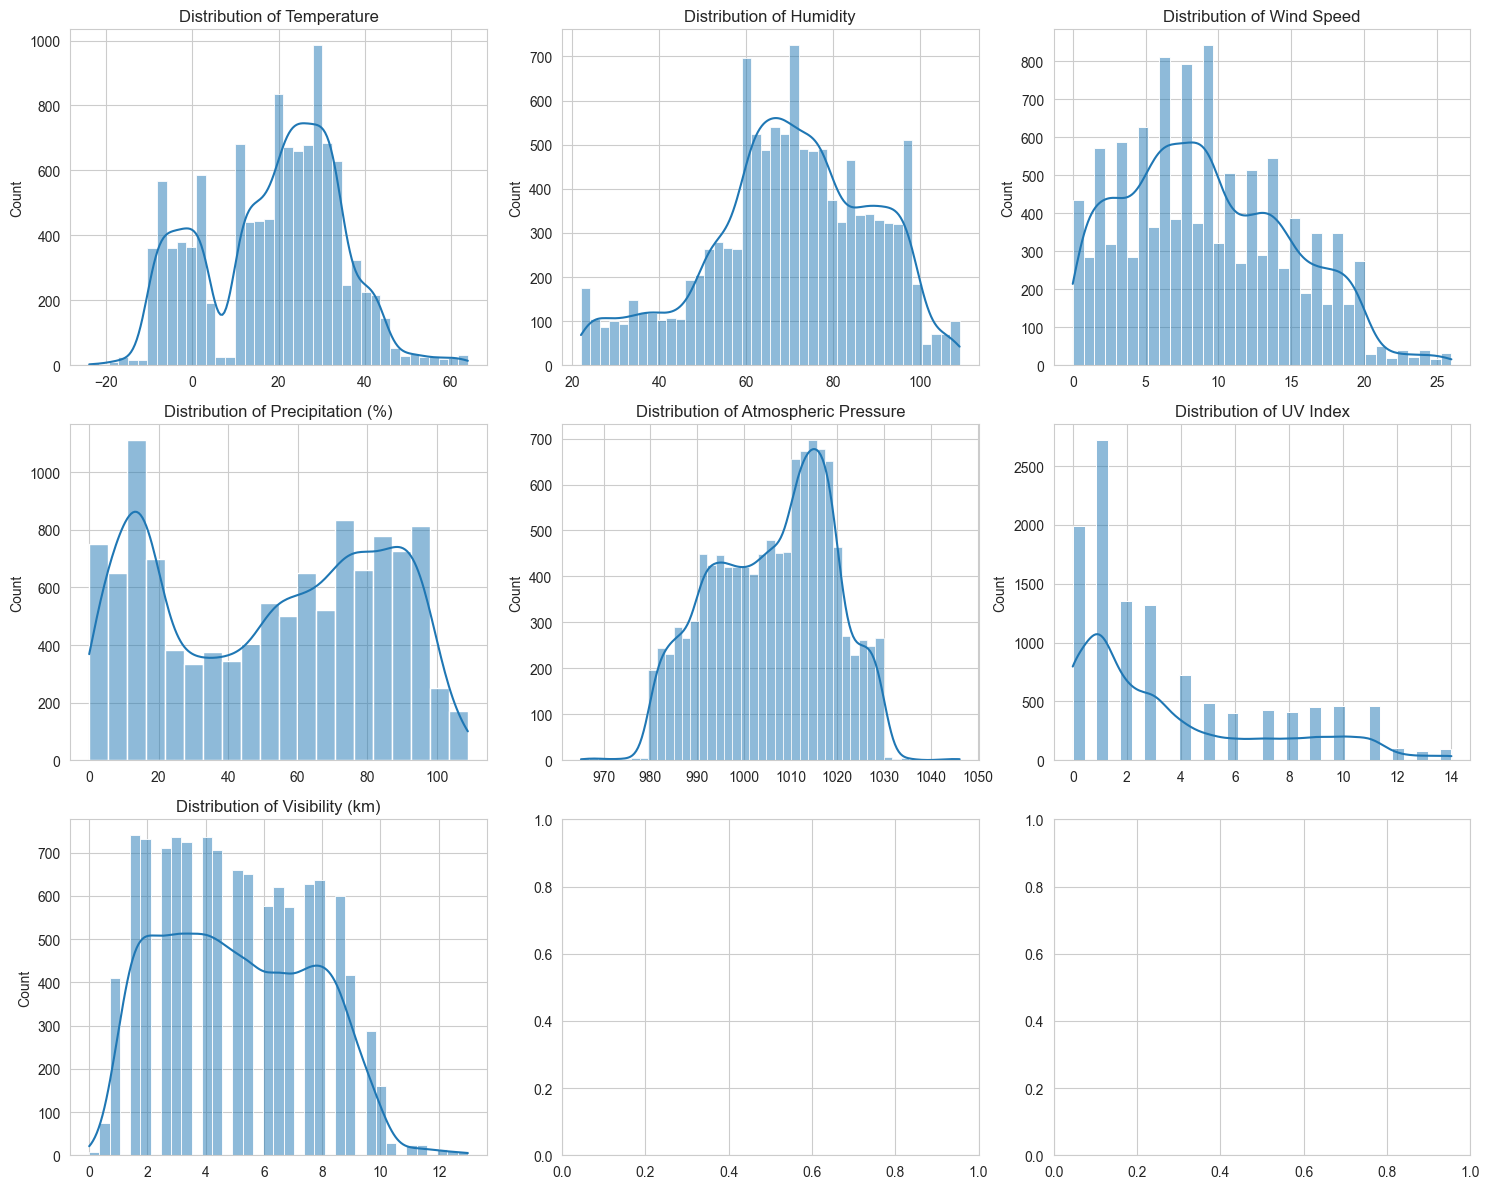

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensuring that we don't exceed the number of subplots
        sns.histplot(weather_df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        
plt.tight_layout()
plt.show()

Getting a summary of the string columns

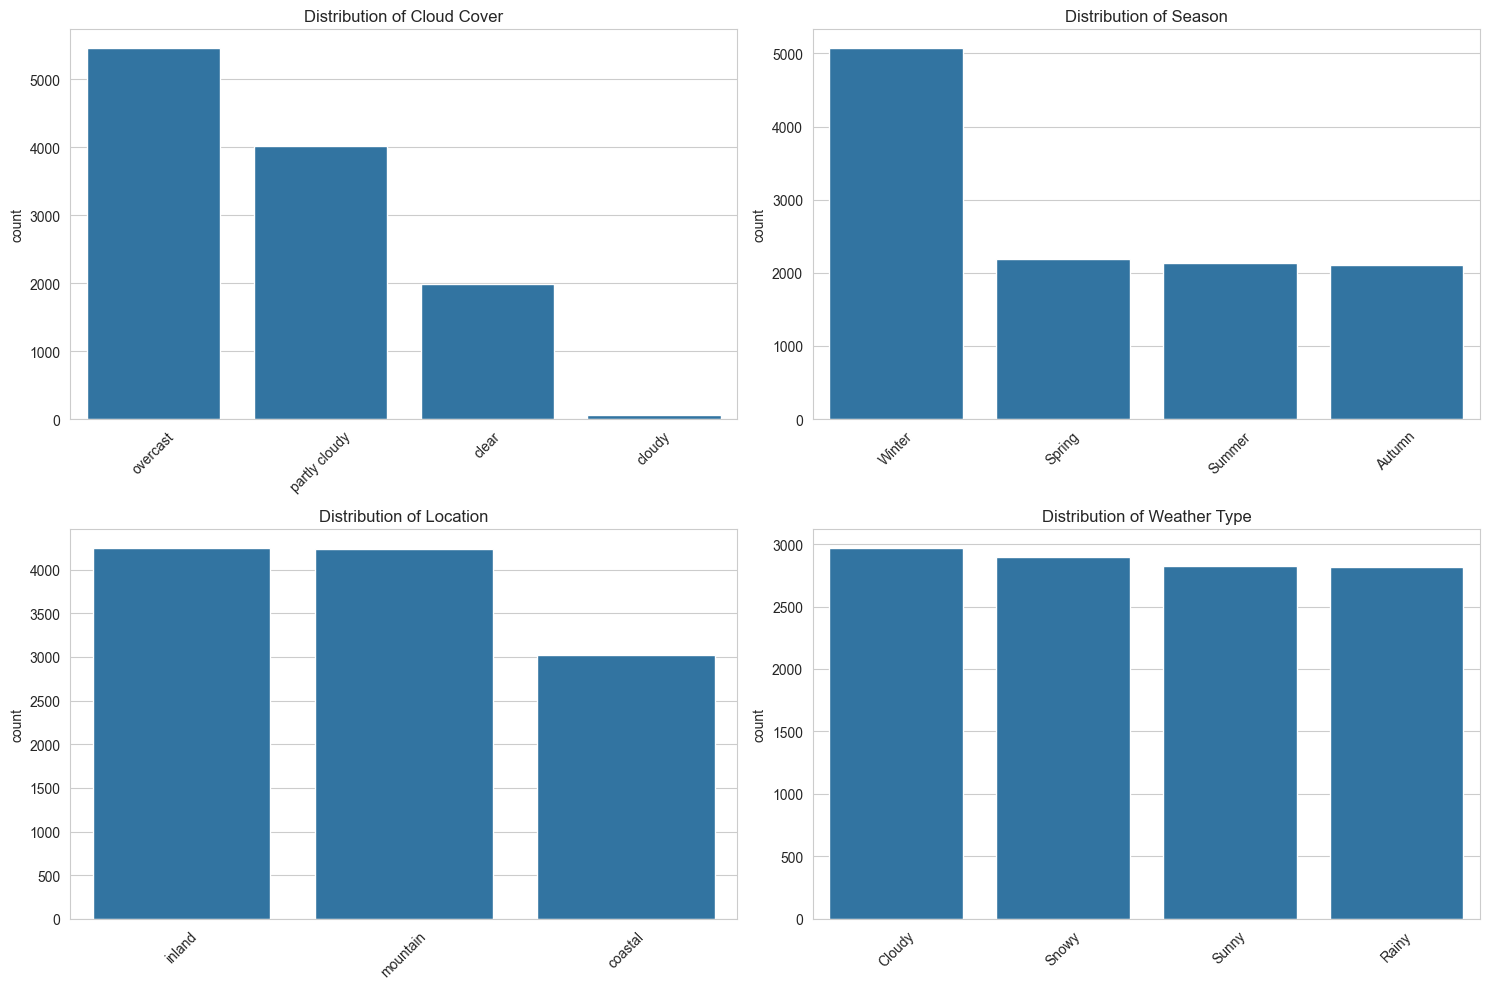

In [15]:
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):  # Ensuring that we don't exceed the number of subplots
        sns.countplot(data=weather_df, x=col, ax=axes[i], order=weather_df[col].value_counts().index)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()

Bivariate Analysis

Cloud Cover vs Numerical Variables

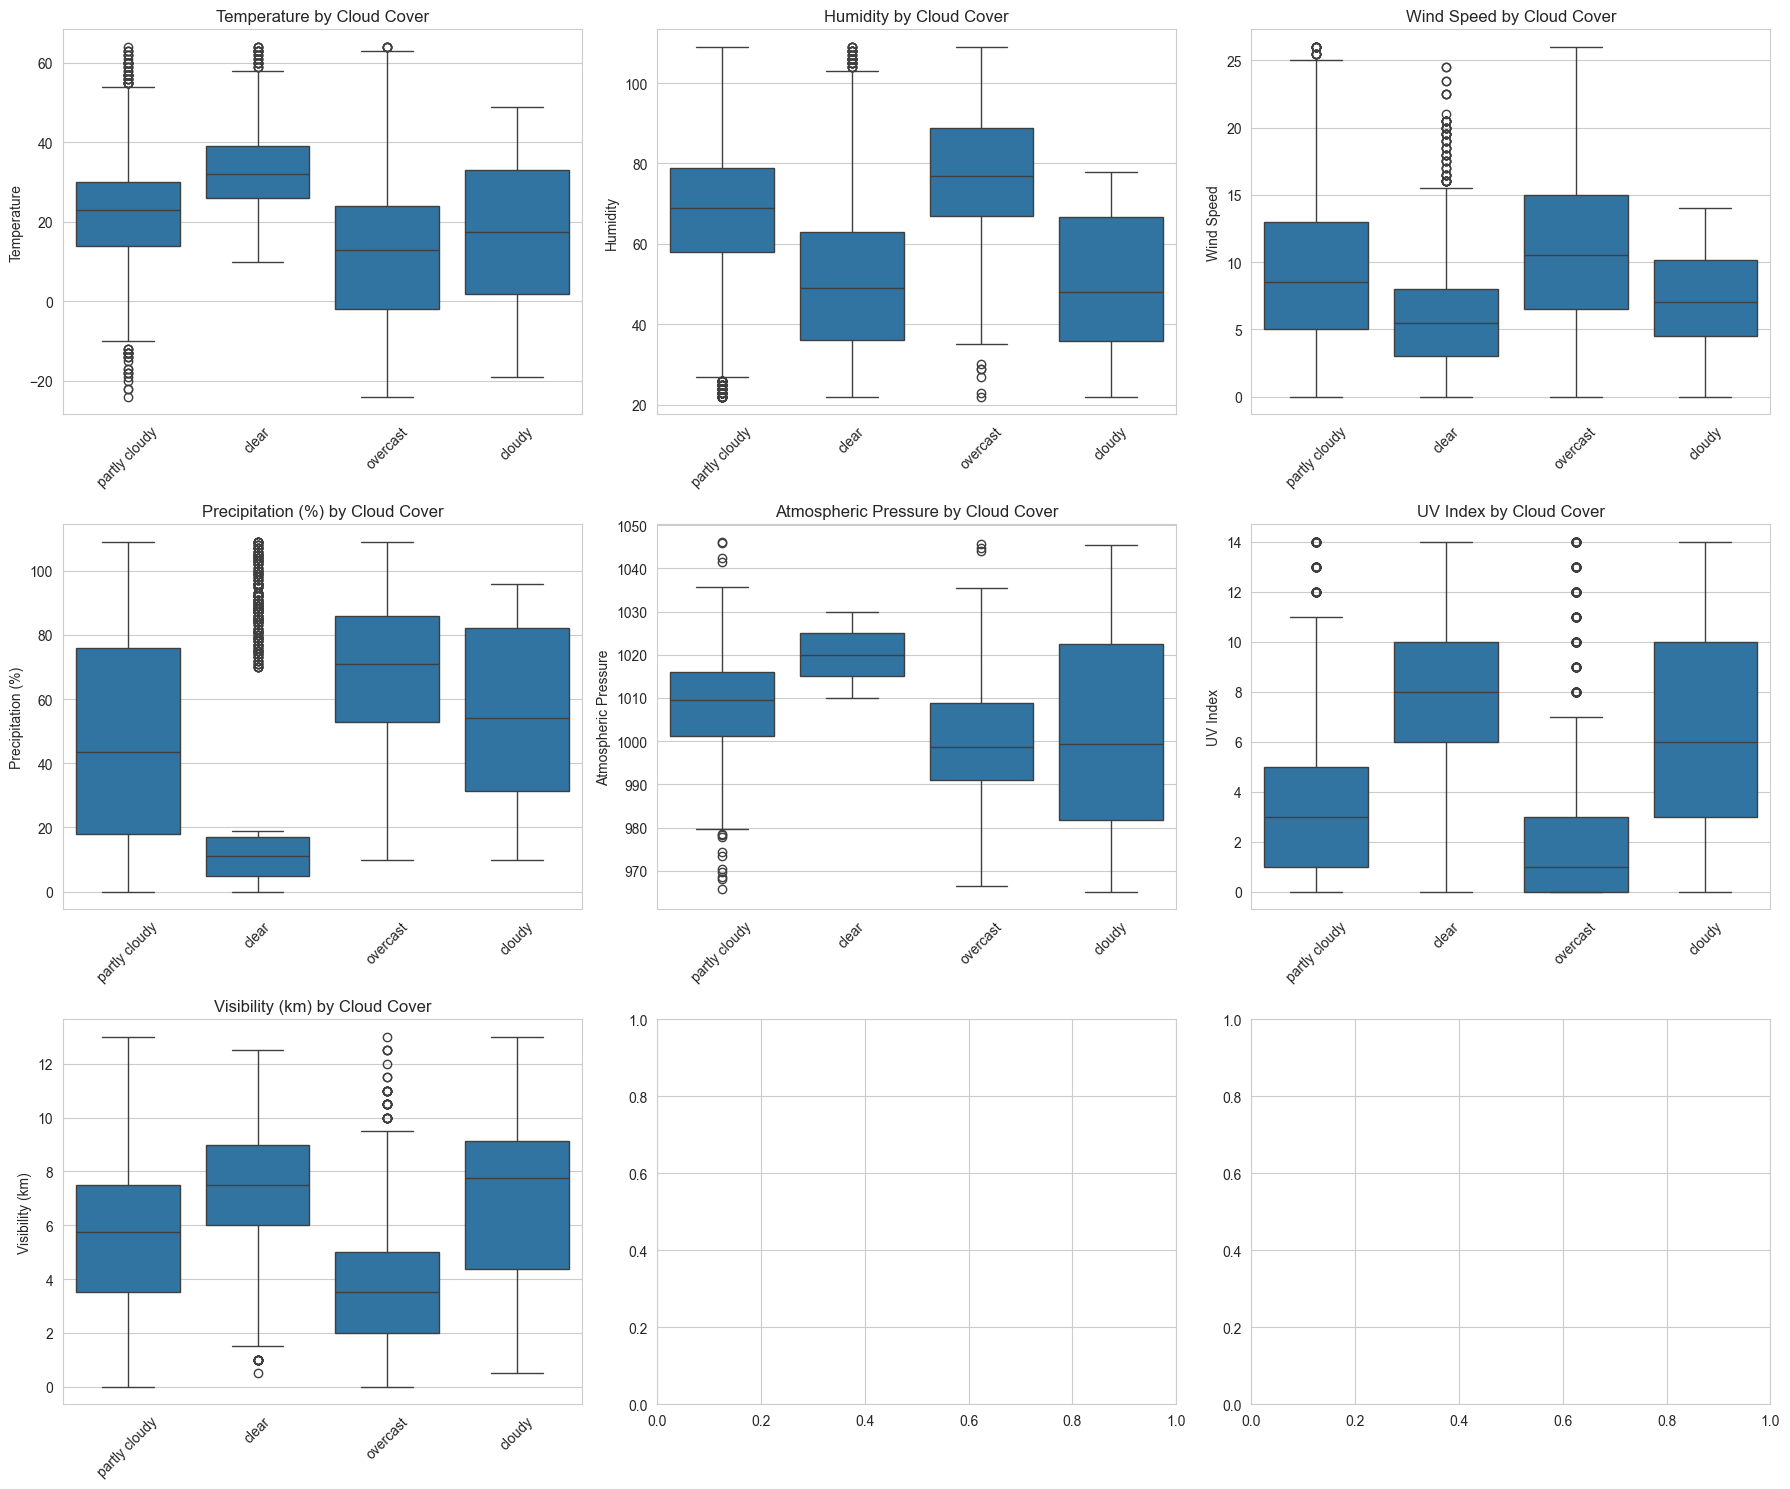

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.boxplot(data=weather_df, x='Cloud Cover', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Cloud Cover')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()

Season vs Numerical Variables

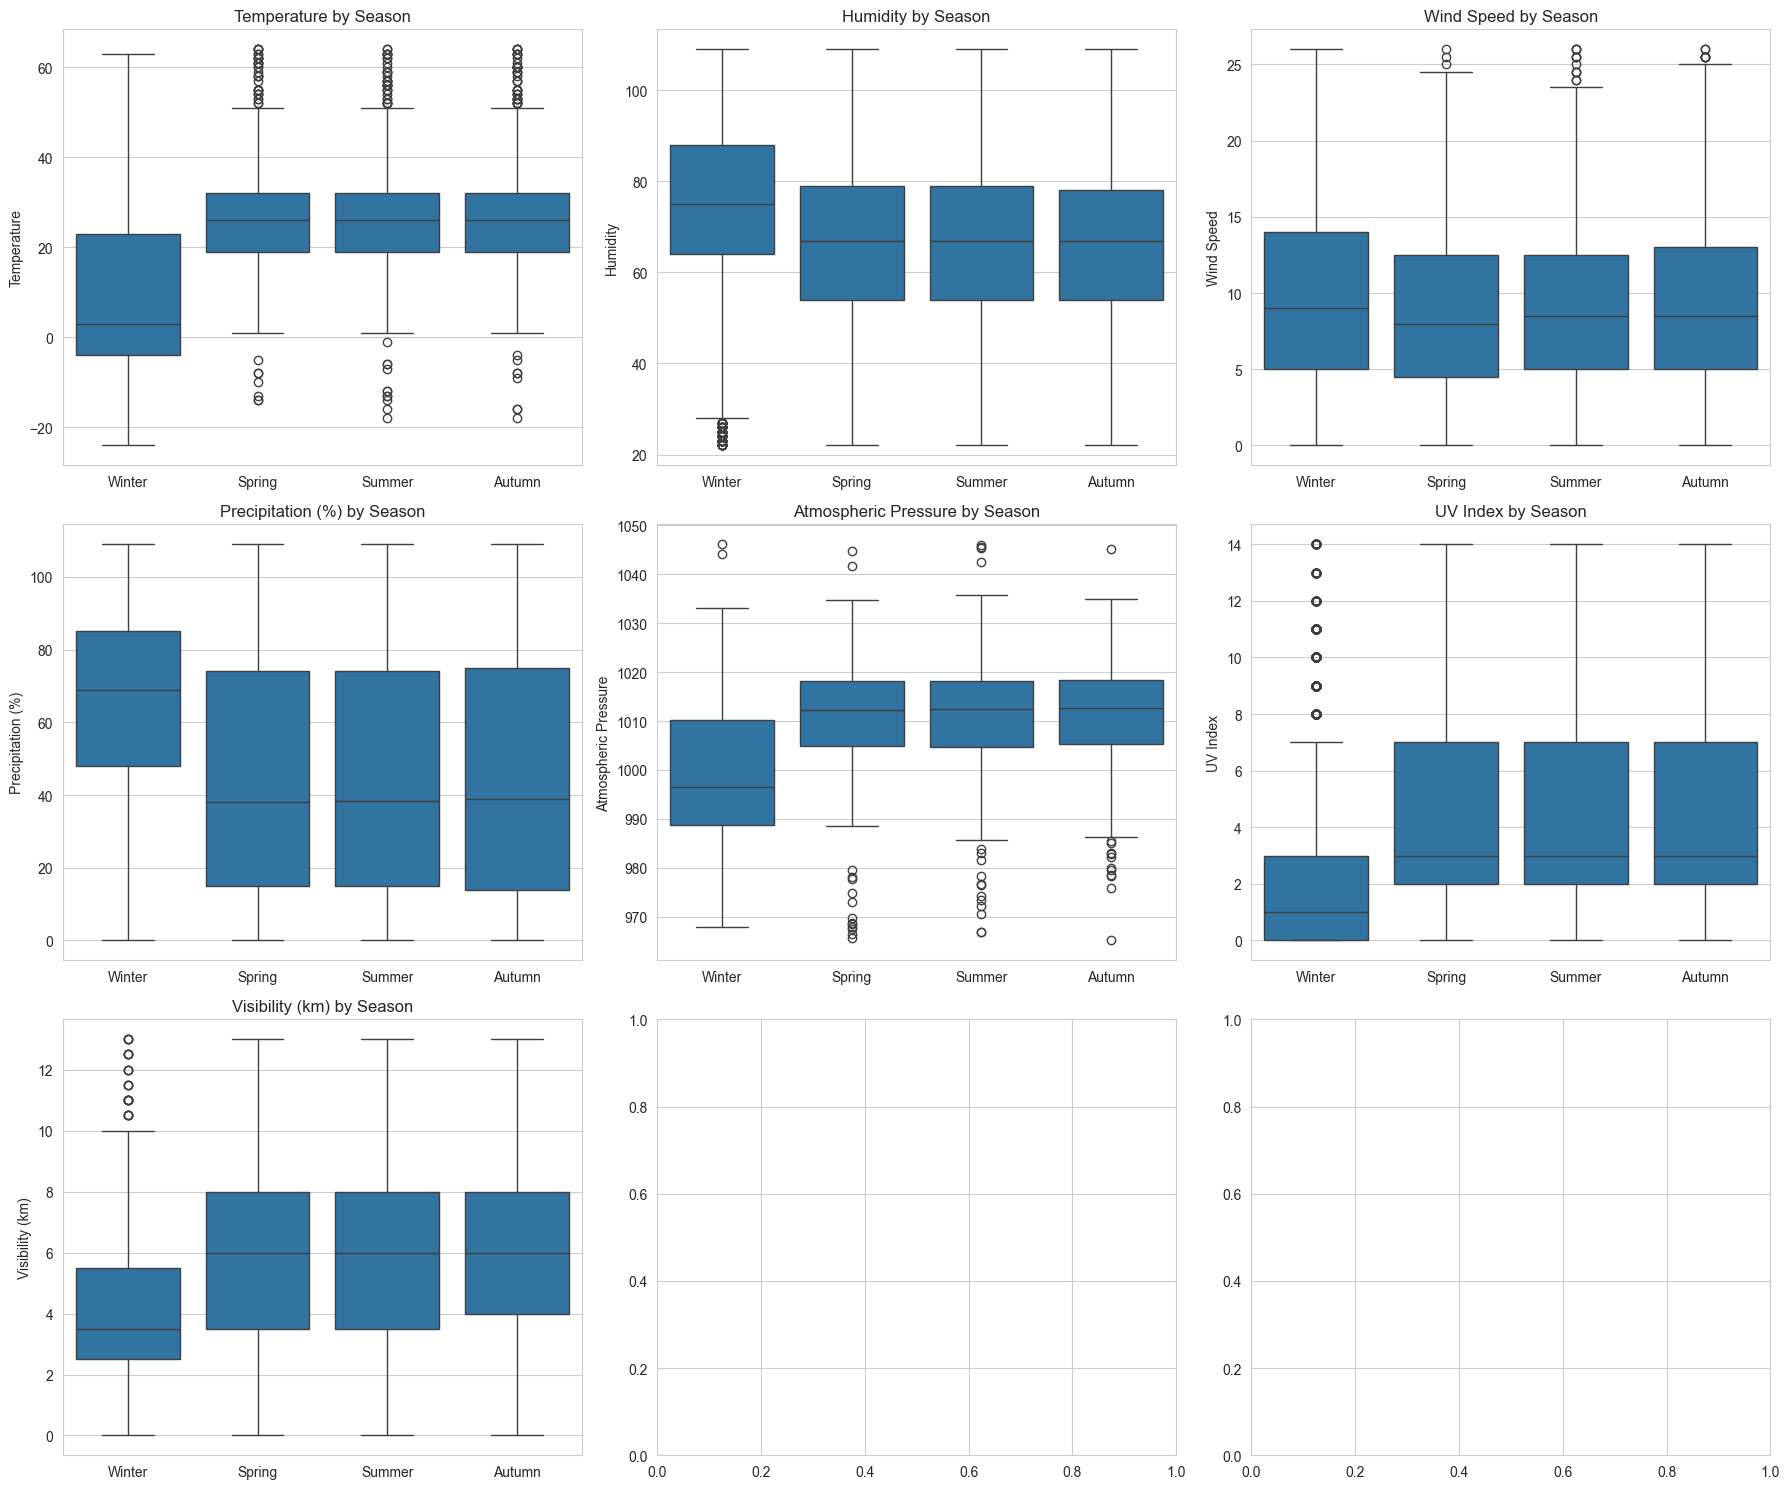

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.boxplot(data=weather_df, x='Season', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Season')
        axes[i].set_xlabel('')
        
plt.tight_layout()
plt.show()

Location vs Numerical Variables

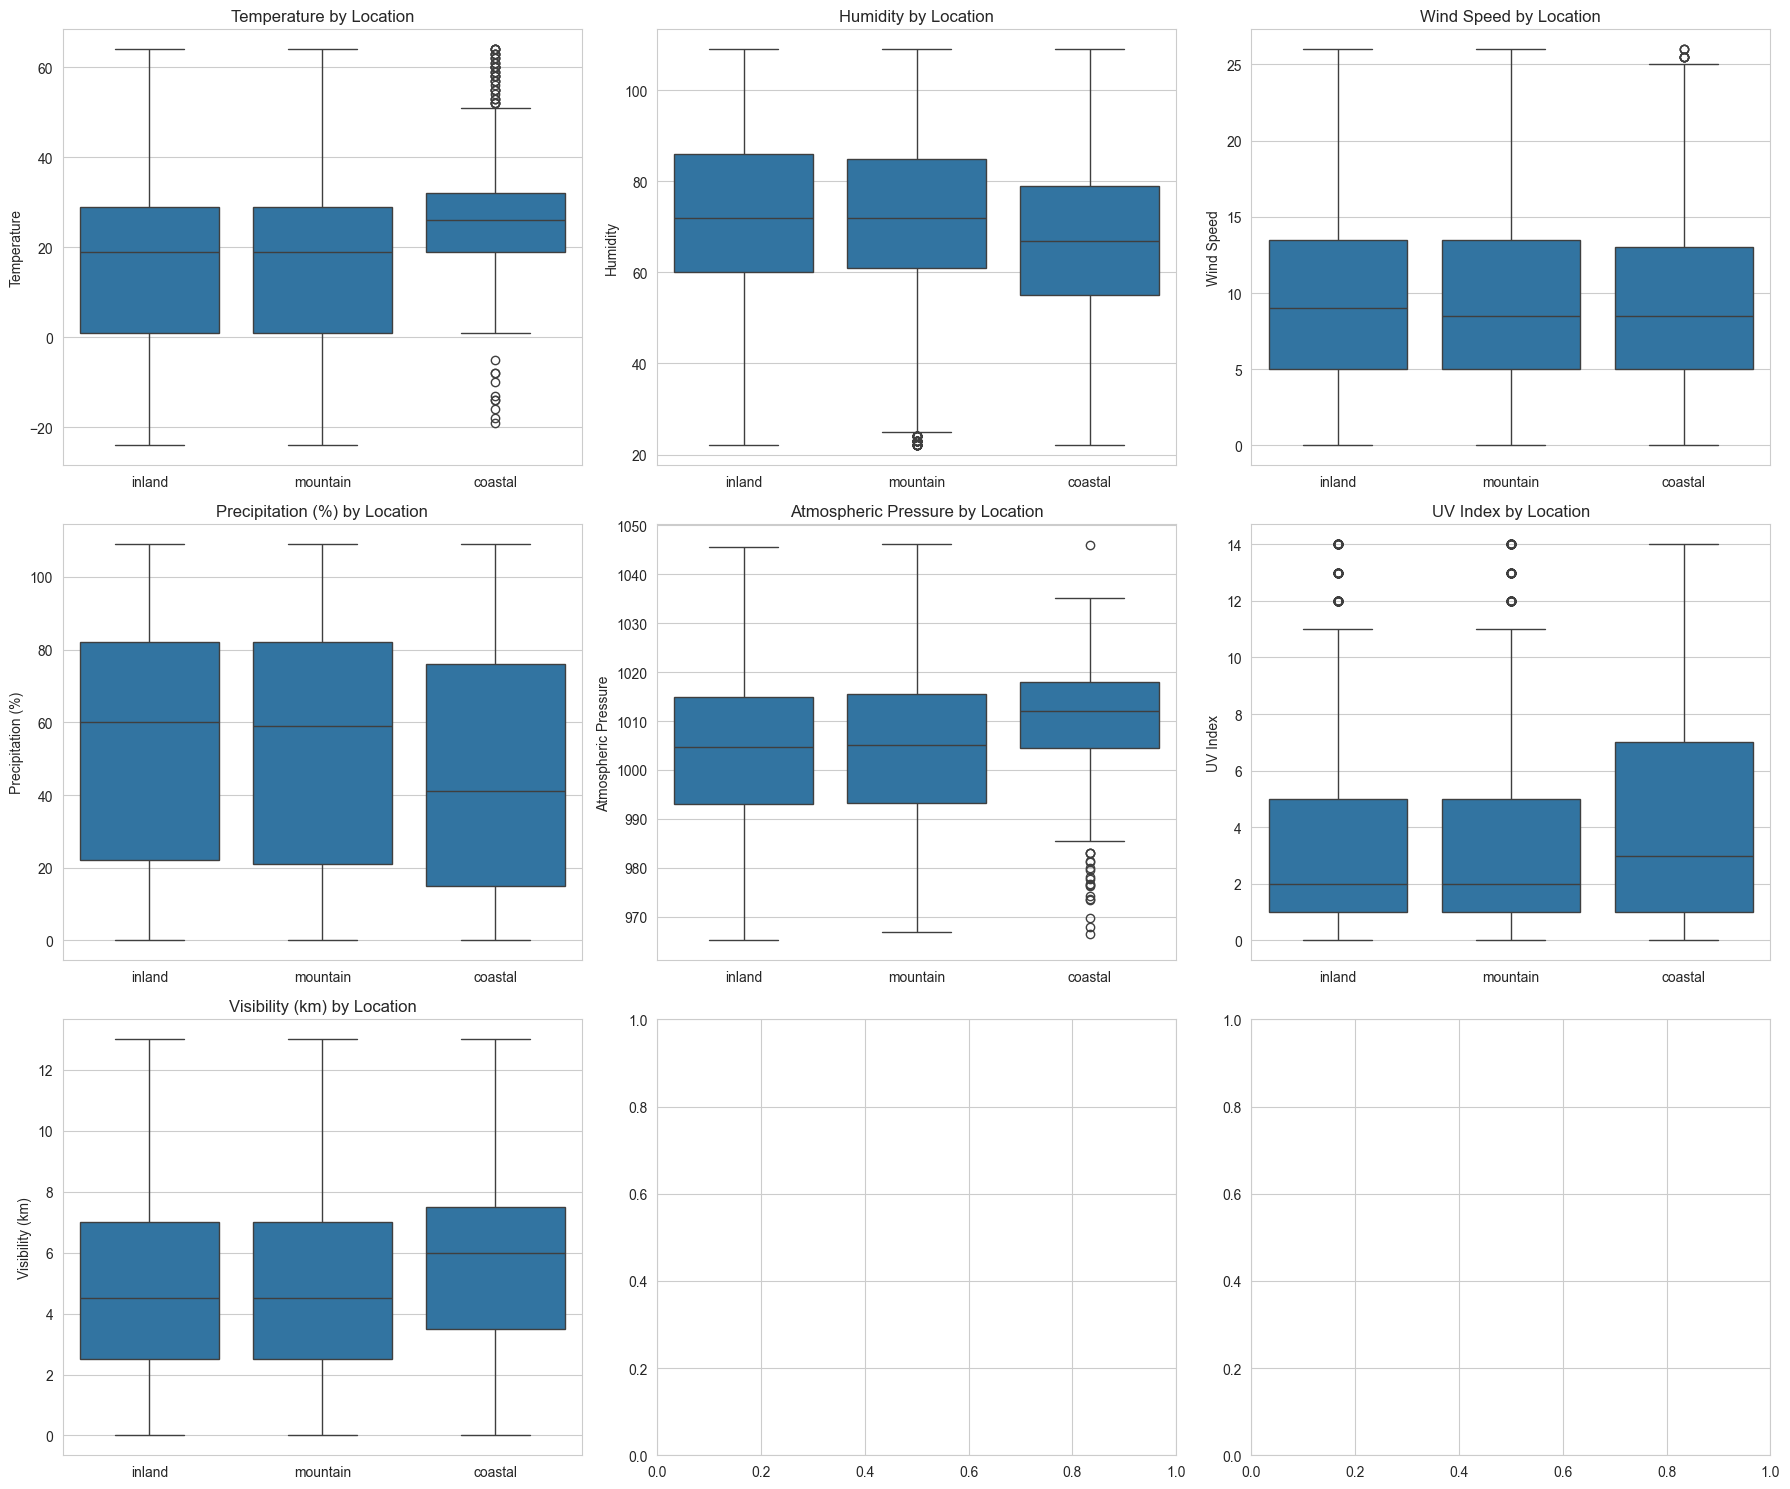

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.boxplot(data=weather_df, x='Location', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Location')
        axes[i].set_xlabel('')
        
plt.tight_layout()
plt.show()

Weather types vs Numerical Variables

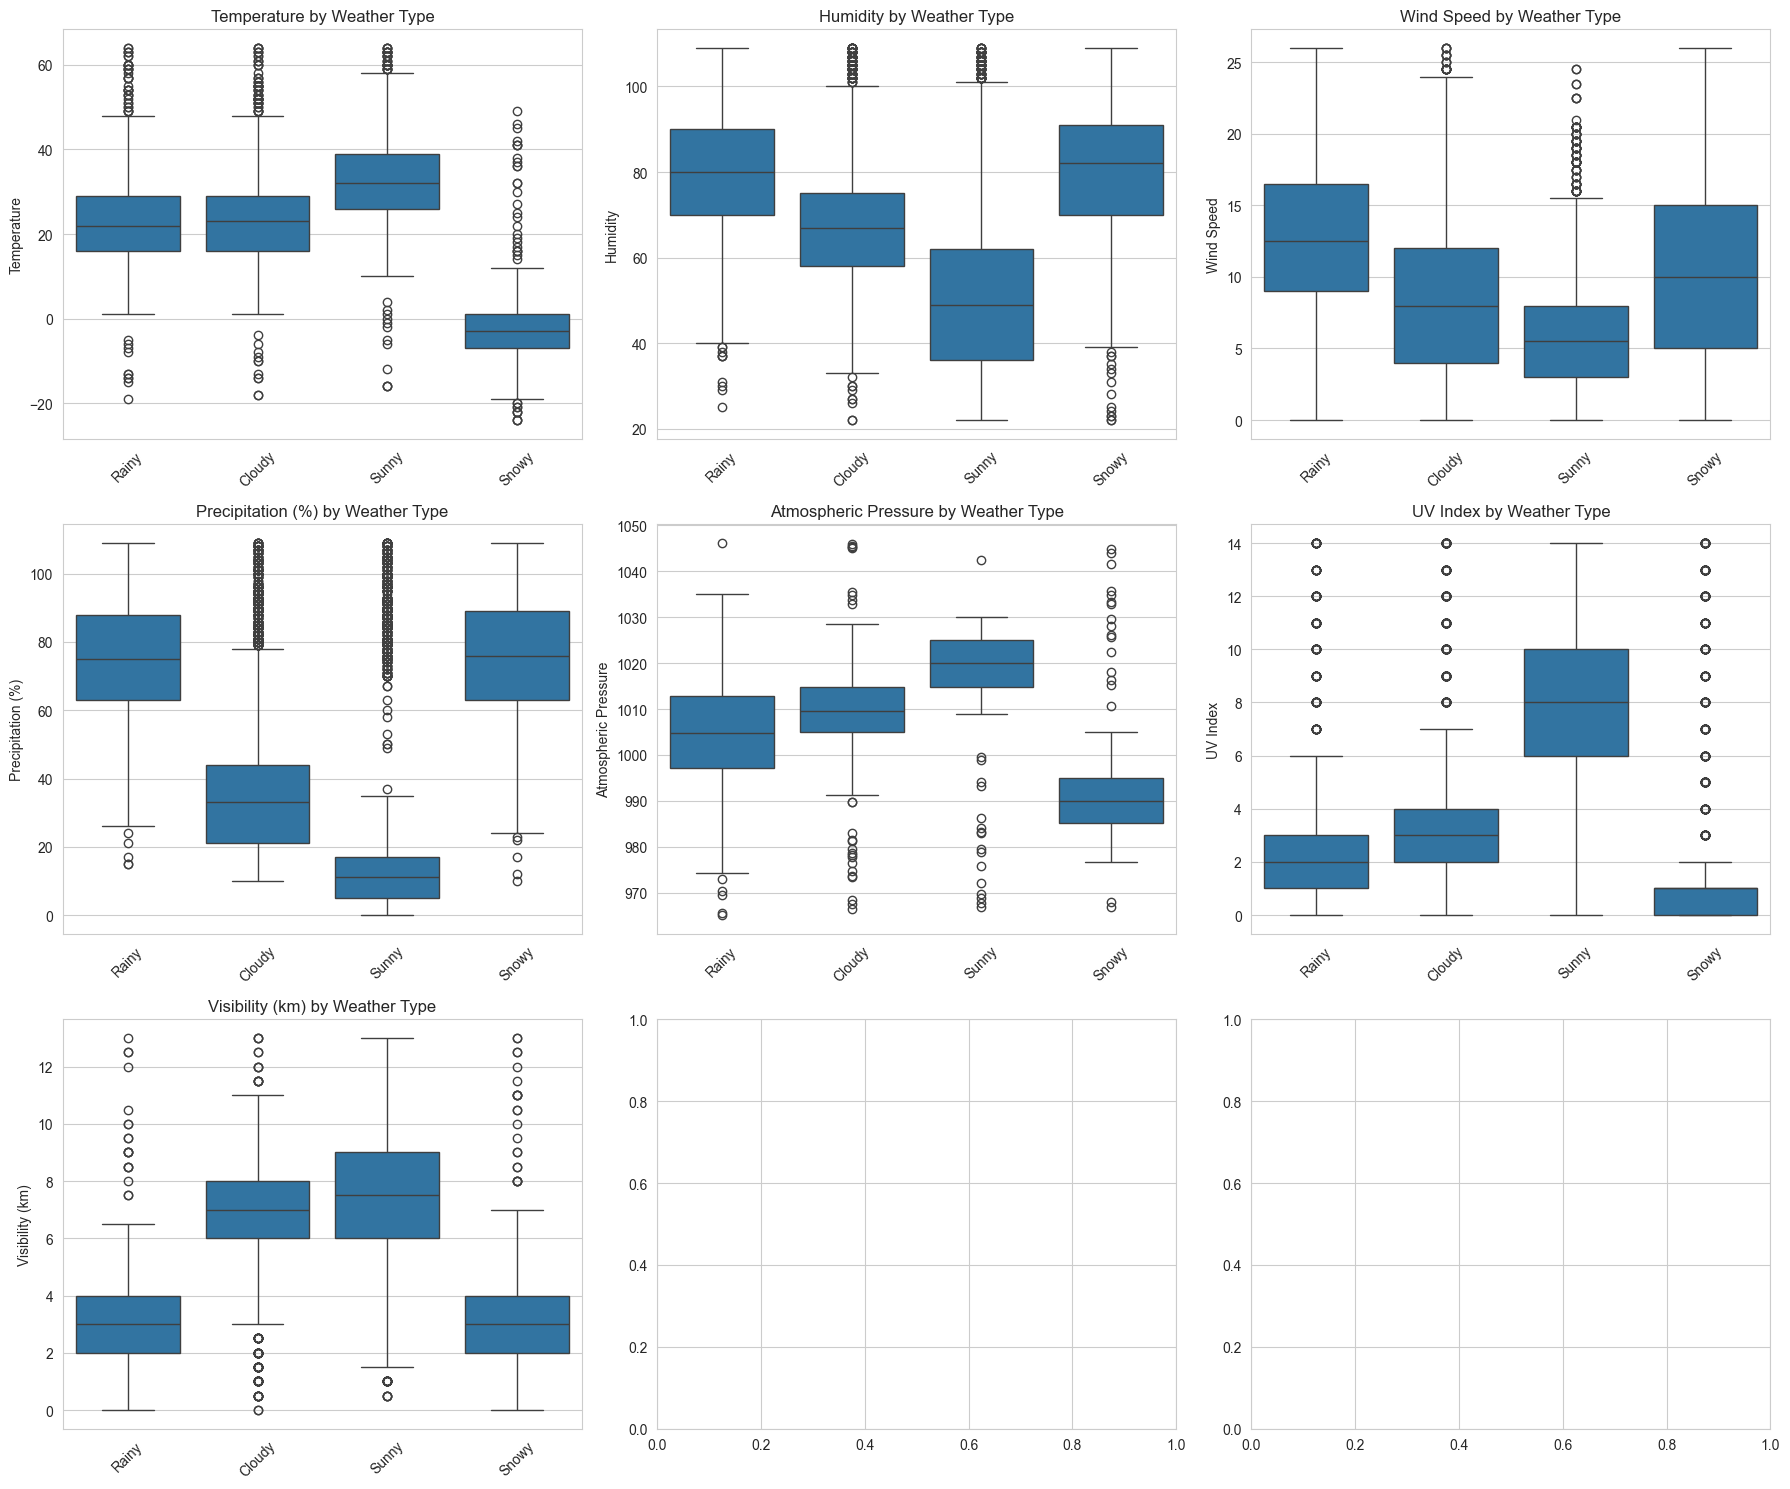

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.boxplot(data=weather_df, x='Weather Type', y=col, ax=axes[i])
        axes[i].set_title(f'{col} by Weather Type')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
plt.tight_layout()
plt.show()

Comparing the Temperature by Location on overcast days

In [20]:
weather_df.query("`Cloud Cover` == 'overcast'").groupby("Location")['Temperature'].agg(['mean', 'min', 'max', 'count'])

,mean,min,max,count
Location,,,,
coastal,23.288360,-8.0,64.0,1134
inland,8.822551,-24.0,63.0,2164
mountain,9.072222,-24.0,64.0,2160


Pairplot comparing valuable features for energy consumpions prediction

Uses a sample of weather_df and season for the hue

In [21]:
def create_sampled_pairplot(df, sample_size):
    numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 
                         'Precipitation (%)', 'Atmospheric Pressure']
    
    if len(df) > sample_size:
        df = df.sample(sample_size, random_state=42)
    
    pair_plot = sns.pairplot(df[numerical_features + ['Season']], 
                             hue='Season',
                             palette='viridis',
                             plot_kws={'alpha': 1, 's': 40, 'edgecolor': 'k'},
                             diag_kind='kde',
                             corner=True)
    
    pair_plot.figure.suptitle('Pair Plot by Season for Energy Consumption Analysis', 
                         fontsize=20, y=1)

    plt.tight_layout()
    return pair_plot

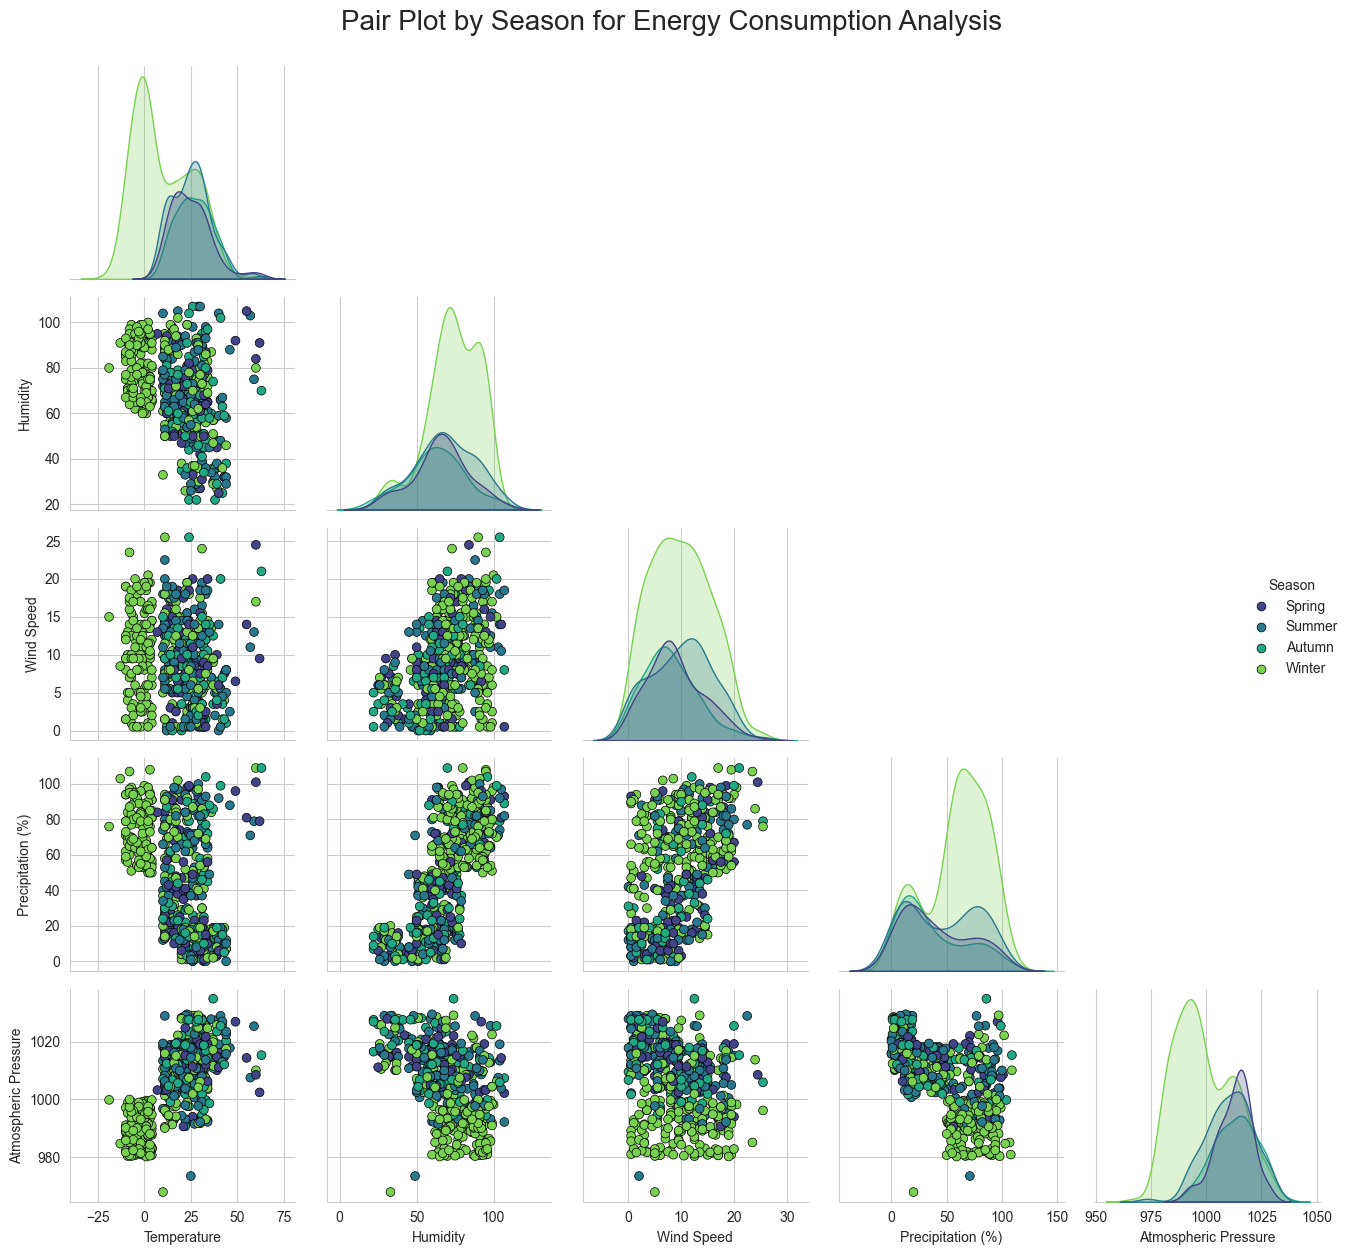

In [22]:
create_sampled_pairplot(weather_df, 500)
plt.show()

Time-Based Analysis to see Seasonal Patterns 

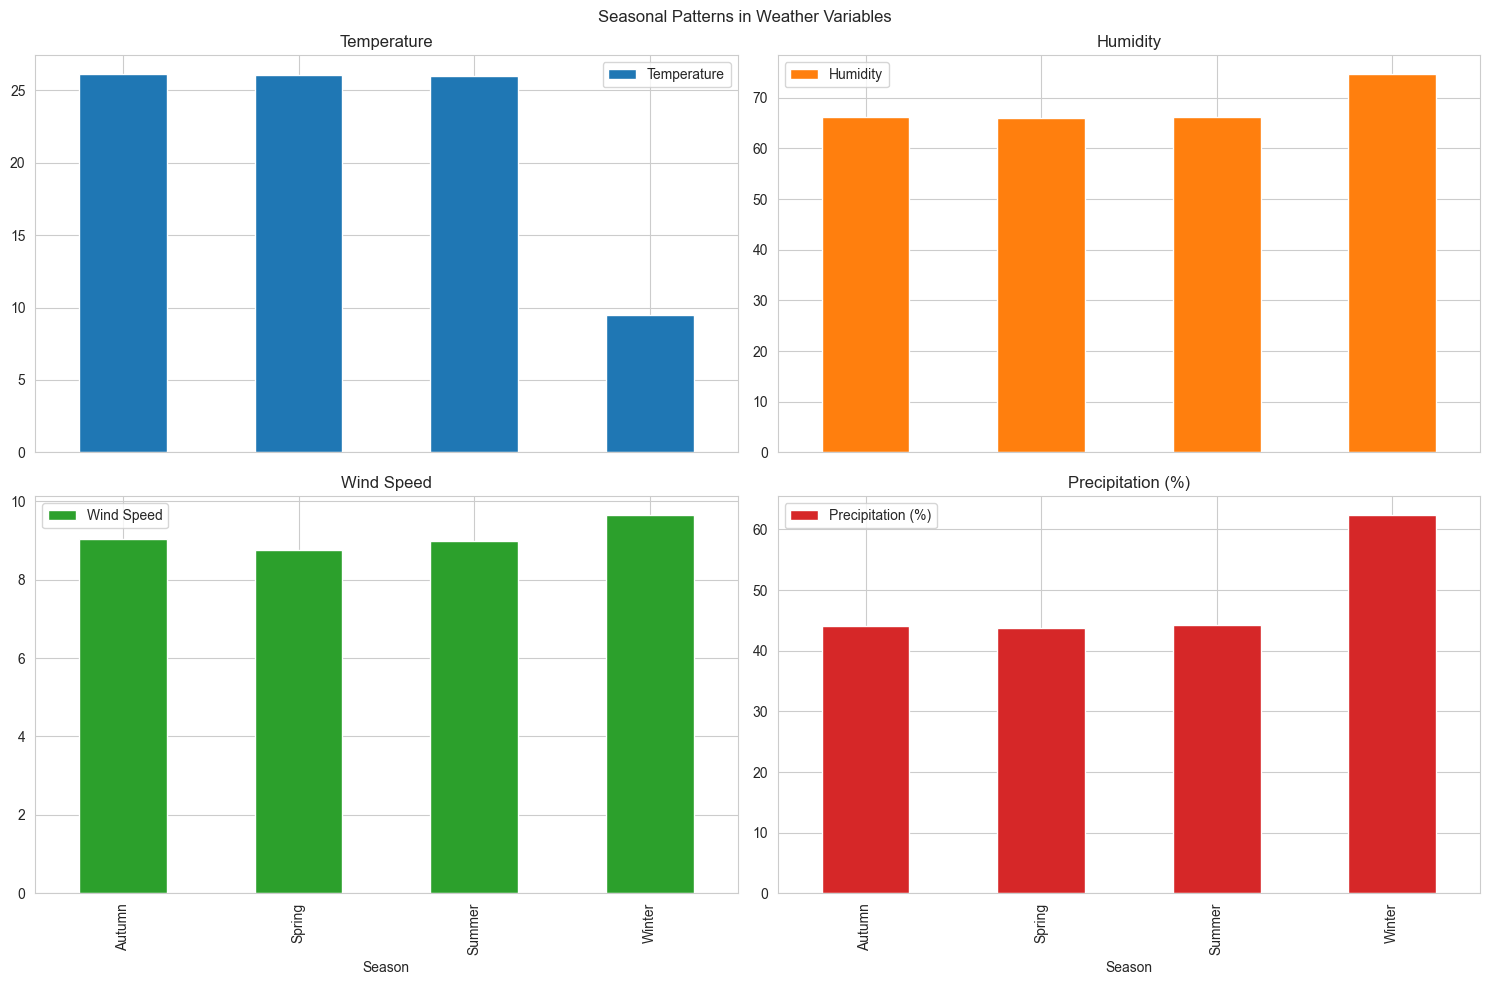

In [23]:
seasonal_means = weather_df.groupby('Season')[numerical_cols].mean()

key_vars = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)']
seasonal_means[key_vars].plot(kind='bar', subplots=True, layout=(2, 2), figsize=(15, 10))
plt.suptitle('Seasonal Patterns in Weather Variables')
plt.tight_layout()
plt.show()

Correlation Analysis

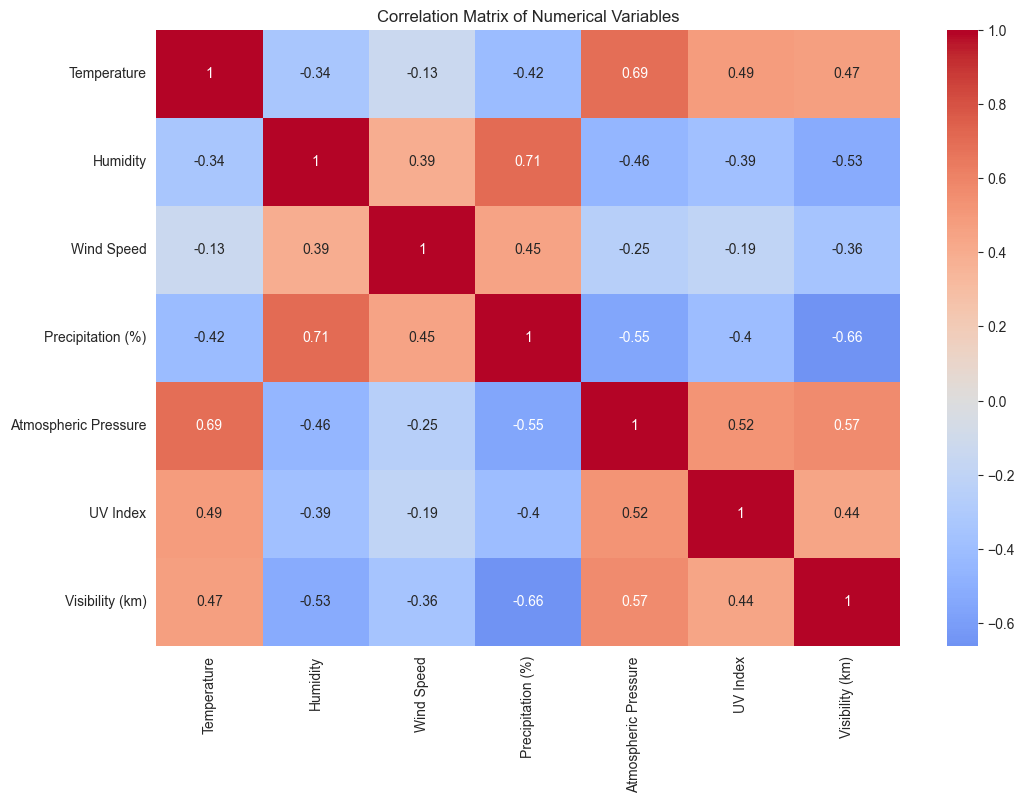

In [24]:


corr_matrix = weather_df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()